In [1]:
import zipfile
import sqlite3
C = zipfile.ZipFile(("images" + '.zip'))
C

<zipfile.ZipFile filename='images.zip' mode='r'>

In [2]:
import land

In [3]:
c = land.open("images")
c
#c.zf.namelist()
#c.close()

In [4]:
name = c.list_images()
print(name)

['area0.npy', 'area1.npy', 'area10.npy', 'area100.npy', 'area101.npy', 'area102.npy', 'area103.npy', 'area104.npy', 'area105.npy', 'area106.npy', 'area107.npy', 'area108.npy', 'area109.npy', 'area11.npy', 'area110.npy', 'area111.npy', 'area112.npy', 'area113.npy', 'area114.npy', 'area115.npy', 'area116.npy', 'area117.npy', 'area118.npy', 'area119.npy', 'area12.npy', 'area120.npy', 'area121.npy', 'area122.npy', 'area123.npy', 'area124.npy', 'area125.npy', 'area126.npy', 'area127.npy', 'area128.npy', 'area129.npy', 'area13.npy', 'area130.npy', 'area131.npy', 'area132.npy', 'area133.npy', 'area134.npy', 'area135.npy', 'area136.npy', 'area137.npy', 'area138.npy', 'area139.npy', 'area14.npy', 'area140.npy', 'area141.npy', 'area142.npy', 'area143.npy', 'area144.npy', 'area145.npy', 'area146.npy', 'area147.npy', 'area148.npy', 'area149.npy', 'area15.npy', 'area150.npy', 'area151.npy', 'area152.npy', 'area153.npy', 'area154.npy', 'area155.npy', 'area156.npy', 'area157.npy', 'area158.npy', 'are

In [5]:
print(c.db)

In [6]:
import pprint
mydb = sqlite3.connect('images.db')       # 链接数据库
cur = mydb.cursor()                         # 创建游标cur来执行SQL语句

# 获取表名
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
Tables = cur.fetchall()                     # Tables 为元组列表
print(Tables)

tbl_name = Tables[0][0]                     # 获取第一个表名

# 获取表的列名
cur.execute("SELECT * FROM {}".format(tbl_name))
col_name_list = [tuple[0] for tuple in cur.description]
pprint.pprint(col_name_list)
'''
# 获取表结构的所有信息
cur.execute("PRAGMA table_info({})".format(tbl_name))
pprint.pprint(cur.fetchall())'''

[('places',), ('images',)]
['place_id', 'name', 'lat', 'lon']


'\n# 获取表结构的所有信息\ncur.execute("PRAGMA table_info({})".format(tbl_name))\npprint.pprint(cur.fetchall())'

In [7]:
tbl_name = Tables[1][0]                     # 获取第一个表名

# 获取表的列名
cur.execute("SELECT * FROM {}".format(tbl_name))
col_name_list = [tuple[0] for tuple in cur.description]
pprint.pprint(col_name_list)

['year', 'image', 'place_id']


In [8]:
images_db = sqlite3.connect('images.db')       # 链接数据库
cur = c.db.cursor()                         # 创建游标cur来执行SQL语句
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")# 获取表名
image_name = "area0.npy"
for row in cur.execute('SELECT * FROM images'):
        if row[1]==image_name: #https://docs.python.org/zh-cn/3/library/sqlite3.html
            print(row)
            print(type(int(row[2])))
            pass

(2001, 'area0.npy', 200)
<class 'int'>


In [9]:
c.image_year("area0.npy")

2001

In [10]:
images_db = sqlite3.connect('images.db')       # 链接数据库
cur = c.db.cursor()                         # 创建游标cur来执行SQL语句
image_name = "area0.npy"
for row in cur.execute('SELECT * FROM images'):
        if row[1]==image_name: #https://docs.python.org/zh-cn/3/library/sqlite3.html
            image_id = row[2]
            print(image_id)
            print(type(int(row[2])))
            pass
for row in cur.execute('SELECT * FROM places'):
        if row[0]==image_id: #https://docs.python.org/zh-cn/3/library/sqlite3.html
            print(type(row[1]))
            pass

200
<class 'int'>
<class 'str'>


In [11]:
c.image_name("area0.npy")

'madison'

In [12]:
import numpy as np
import os
name = "area0.npy"
#with c.zf.open(name) as f:
#with io.BufferedReader(c.zf.open(name, mode='r')) as f:
#            a = np.load(f)
c.zf.extract(name)
a = np.load(name)
os.remove(name)
a[0][0]-41
np.size(a)

#a = a.astype(int)
#f = c.zf.read(name)

1440000

In [13]:
with land.open("images") as c:
    # gets alphabetically sorted list of images
    # expected: ['area0.npy', 'area1.npy', 'area10.npy', 'area100.npy', ...]
    print(c.list_images()) 
    
    # get name from DB corresponding to this image
    # expected: 2001 (of type int, not int64)
    print(c.image_year("area0.npy"))

    # get name from DB corresponding to this image
    # should be "madison"
    print(c.image_name("area0.npy")) 
    
    # get numpy area that encodes area usage
    # should be a 2-dimensional numpy array
    print(c.image_load("area0.npy"))

['area0.npy', 'area1.npy', 'area10.npy', 'area100.npy', 'area101.npy', 'area102.npy', 'area103.npy', 'area104.npy', 'area105.npy', 'area106.npy', 'area107.npy', 'area108.npy', 'area109.npy', 'area11.npy', 'area110.npy', 'area111.npy', 'area112.npy', 'area113.npy', 'area114.npy', 'area115.npy', 'area116.npy', 'area117.npy', 'area118.npy', 'area119.npy', 'area12.npy', 'area120.npy', 'area121.npy', 'area122.npy', 'area123.npy', 'area124.npy', 'area125.npy', 'area126.npy', 'area127.npy', 'area128.npy', 'area129.npy', 'area13.npy', 'area130.npy', 'area131.npy', 'area132.npy', 'area133.npy', 'area134.npy', 'area135.npy', 'area136.npy', 'area137.npy', 'area138.npy', 'area139.npy', 'area14.npy', 'area140.npy', 'area141.npy', 'area142.npy', 'area143.npy', 'area144.npy', 'area145.npy', 'area146.npy', 'area147.npy', 'area148.npy', 'area149.npy', 'area15.npy', 'area150.npy', 'area151.npy', 'area152.npy', 'area153.npy', 'area154.npy', 'area155.npy', 'area156.npy', 'area157.npy', 'area158.npy', 'are

In [14]:
sqlite3.connect("images"+".db")

In [15]:
import sklearn
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

5.965578948401942 -243.38363729644226


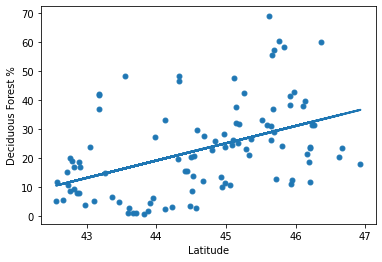

In [16]:
fig, ax = plt.subplots()
ax.set_ylabel('Deciduous Forest %')
ax.set_xlabel('Latitude')

c = land.open("images")
use_code = 41
images_list = c.list_images()
df_latperc = pd.DataFrame(columns=['latitute','percent'])
for image_npy in images_list:
    if c.image_name(image_npy)[0:4] == 'samp':
        npy = c.image_load(image_npy)
        npy = npy - use_code
        df_latperc = df_latperc.append(pd.DataFrame({'latitute':[c.image_lat(image_npy)],'percent':[100*np.sum(npy == 0) / np.size(npy)]}), ignore_index = True)
df_latperc_array = df_latperc.values
x = df_latperc_array[:,0]
y = df_latperc_array[:,1]
Linear_regree = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1).fit(x[:,np.newaxis],y)
print(Linear_regree.coef_[0],Linear_regree.intercept_)
ax.scatter(x, y, s = 24)
ax.plot(x ,Linear_regree.predict(x[:, np.newaxis]) ,linewidth = 2)

In [17]:
use_code = 41
type(use_code)

int

In [18]:
type({'latitute':c.image_lat(image_npy),'percent':100*np.sum(npy == 0) / np.size(npy)})

dict

6.933812979673682 -289.86655243332496


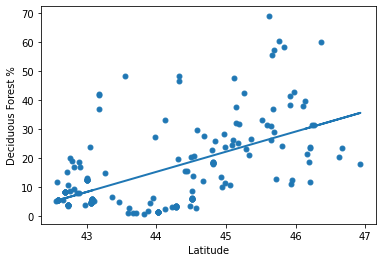

In [19]:
fig, ax = plt.subplots()
ax.set_ylabel('Deciduous Forest %')
ax.set_xlabel('Latitude')

c = land.open("images")
use_code = 41
images_list = c.list_images()
df_latperc = np.zeros((len(images_list), 2))
i = 0
for image_npy in images_list:
    npy = c.image_load(image_npy)
    npy = npy - use_code
    df_latperc[i][0] = c.image_lat(image_npy)
    df_latperc[i][1] = 100*np.sum(npy == 0) / np.size(npy)
    i += 1
x = df_latperc[:,0]
y = df_latperc[:,1]
#https://scikit-learn.org/stable/auto_examples/plot_isotonic_regression.html#sphx-glr-auto-examples-plot-isotonic-regression-py
Linear_regree = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1).fit(x[:,np.newaxis],y)
print(Linear_regree.coef_[0],Linear_regree.intercept_)
ax.scatter(x, y, s = 24)
ax.plot(x ,Linear_regree.predict(x[:, np.newaxis]) ,linewidth = 2)

In [20]:
print(type(float(Linear_regree.coef_[0])),type(float(Linear_regree.intercept_)))

<class 'float'> <class 'float'>


In [21]:
x = df_latperc_array[:,0]
y = df_latperc_array[:,1]
a = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1).fit(x[:,np.newaxis],y)
#print(slope, intercept)

In [22]:
dir(Linear_regree)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

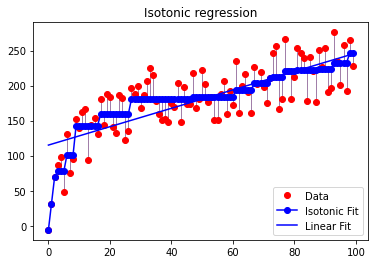

In [23]:
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

n = 100
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))

# #############################################################################
# Fit IsotonicRegression and LinearRegression models

ir = IsotonicRegression()

y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

# #############################################################################
# Plot result

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'b.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()

(5.965578948401942, -243.38363729644226)

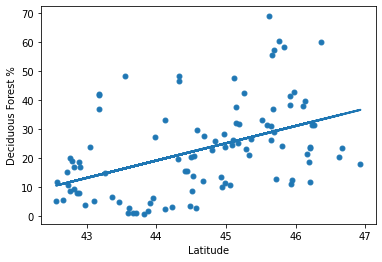

In [24]:
fig, ax = plt.subplots()
ax.set_ylabel('Deciduous Forest %')
ax.set_xlabel('Latitude')
c.lat_regression(41, ax)

In [25]:
name = 'madison'
list_code = [21,22,23,24]
for i in list_code:
    print(type(i))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [26]:
c.zf.extract("area0.npy")
npy = np.load("area0.npy")
os.remove("area0.npy")
freq_sum = 0
for i in list_code:
    freq_sum += np.sum((npy-i) == 0)
freq_sum

328070

In [27]:
np.sum((npy-24) == 0)

22114

In [28]:
np.sum((npy-23) == 0)

60303

In [29]:
np.sum((npy-22) == 0)

149236

In [30]:
np.sum((npy-21) == 0)

96417

0.3368827825670497 -651.19395414272


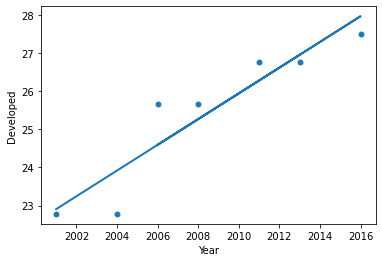

In [31]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")

images_list = c.list_images()
df_yearperc = pd.DataFrame(columns=['year','percent'])
for image_npy in images_list:
    if c.image_name(image_npy) == name:
        #print(c.image_name(image_npy))
        npy = c.image_load(image_npy)
        freq_sum = 0
        for i in list_code:
            freq_sum += np.sum((npy-i) == 0)
        df_yearperc = df_yearperc.append(pd.DataFrame({'year':[c.image_year(image_npy)],'percent':[100*freq_sum / np.size(npy)]}), ignore_index = False)
df_yearperc_array = df_yearperc.values
x = df_yearperc_array[:,0]
y = df_yearperc_array[:,1]
Linear_regree = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1).fit(x[:,np.newaxis],y)

ax.scatter(x, y, s = 24)
ax.plot(x ,Linear_regree.predict(x[:, np.newaxis]) ,linewidth = 2)
print(Linear_regree.coef_[0],Linear_regree.intercept_)

In [32]:
df_yearperc

,year,percent
0,2001,22.782639
0,2004,22.782639
0,2016,27.494444
0,2006,25.655764
0,2008,25.655764
0,2011,26.753056
0,2013,26.753056


(0.3368827825670497, -651.19395414272)

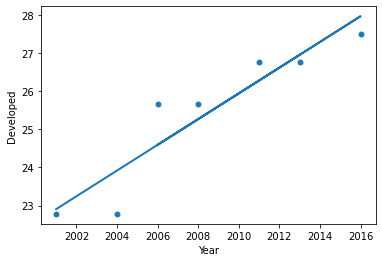

In [33]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")
c.year_regression("madison", [21,22,23,24], ax)

(0.13874341475095794, -226.2945815373565)

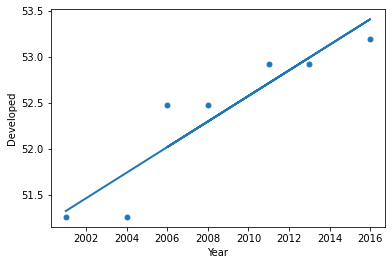

In [34]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")
c.year_regression("milwaukee", [21,22,23,24], ax)

(0.21129501915708793, -403.66924712643635)

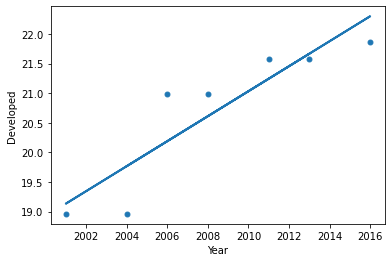

In [35]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")
c.year_regression("greenbay", [21,22,23,24], ax)

(0.24412308429118756, -470.81482902298814)

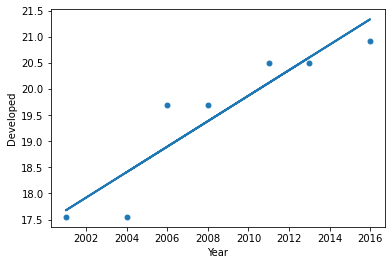

In [36]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")
c.year_regression("kenosha", [21,22,23,24], ax)

(0.2011705579501915, -387.4433034602489)

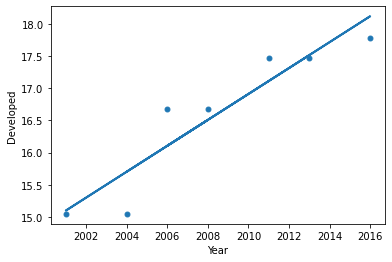

In [37]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")
c.year_regression("racine", [21,22,23,24], ax)

(0.30902227011494265, -598.5809025383144)

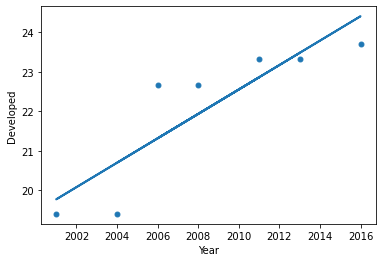

In [38]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")
c.year_regression("appleton", [21,22,23,24], ax)

(0.2966710967432947, -555.8647209051718)

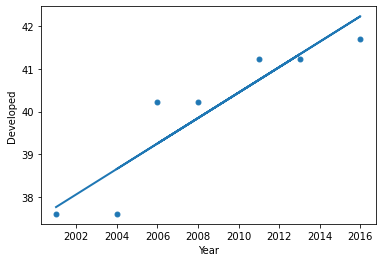

In [39]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")
c.year_regression("waukesha", [21,22,23,24], ax)

(0.10146671455938688, -193.44329142720287)

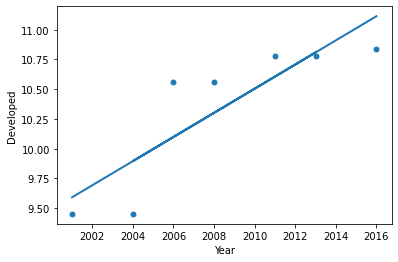

In [40]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")
c.year_regression("oshkosh", [21,22,23,24], ax)

(0.14103238745210728, -270.3340220905172)

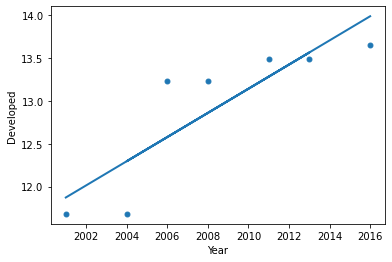

In [41]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")
c.year_regression("eauclaire", [21,22,23,24], ax)

(0.09741409243295027, -183.66503023227983)

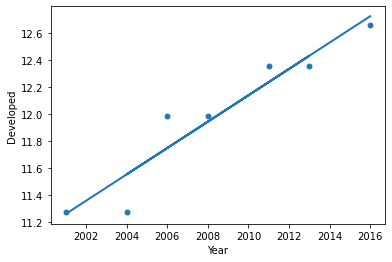

In [42]:
fig, ax = plt.subplots()
ax.set_ylabel("Developed")
ax.set_xlabel("Year")
c.year_regression("janesville", [21,22,23,24], ax)

In [43]:
from IPython.core.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap

In [44]:
name = "eauclaire"

In [45]:
images_list = c.list_images()
year_list = list()
for image_npy in images_list:
    if c.image_name(image_npy) == name:
        year_list.append(c.image_year(image_npy))
year_list.sort()

fig, ax = plt.subplots(figsize = (10,10))
fps = 1

use_cmap = np.zeros(shape=(256,4))
use_cmap[:,-1] = 1
uses = np.array([
    [0, 0.00000000000, 0.00000000000, 0.00000000000],
    [11, 0.27843137255, 0.41960784314, 0.62745098039],
    [12, 0.81960784314, 0.86666666667, 0.97647058824],
    [21, 0.86666666667, 0.78823529412, 0.78823529412],
    [22, 0.84705882353, 0.57647058824, 0.50980392157],
    [23, 0.92941176471, 0.00000000000, 0.00000000000],
    [24, 0.66666666667, 0.00000000000, 0.00000000000],
    [31, 0.69803921569, 0.67843137255, 0.63921568628],
    [41, 0.40784313726, 0.66666666667, 0.38823529412],
    [42, 0.10980392157, 0.38823529412, 0.18823529412],
    [43, 0.70980392157, 0.78823529412, 0.55686274510],
    [51, 0.64705882353, 0.54901960784, 0.18823529412],
    [52, 0.80000000000, 0.72941176471, 0.48627450980],
    [71, 0.88627450980, 0.88627450980, 0.75686274510],
    [72, 0.78823529412, 0.78823529412, 0.46666666667],
    [73, 0.60000000000, 0.75686274510, 0.27843137255],
    [74, 0.46666666667, 0.67843137255, 0.57647058824],
    [81, 0.85882352941, 0.84705882353, 0.23921568628],
    [82, 0.66666666667, 0.43921568628, 0.15686274510],
    [90, 0.72941176471, 0.84705882353, 0.91764705882],
    [95, 0.43921568628, 0.63921568628, 0.72941176471],
])
for row in uses:
    use_cmap[int(row[0]),:-1] = row[1:]
use_cmap = ListedColormap(use_cmap)

def show_img(frame_num):#, name, year_list, ax, images_list
    ax.cla()
    for image_npy in images_list:
        if c.image_name(image_npy) == name and c.image_year(image_npy) == year_list[frame_num-1]:
            map_np = c.image_load(image_npy)
            pass
    ax.imshow(map_np, cmap = use_cmap, vmin=0, vmax=255)
    ax.set_title(str(year_list[frame_num-1]), fontsize= 24)
    return 
#show_img(1,name, year_list, ax, images_list)

anim = FuncAnimation(fig, show_img, frames=len(year_list), interval = 1000/fps)#(name, year_list, ax, images_list)
html =anim.to_html5_video()
plt.close(fig)
HTML(html)

In [46]:
html = c.animate(name)
HTML(html)